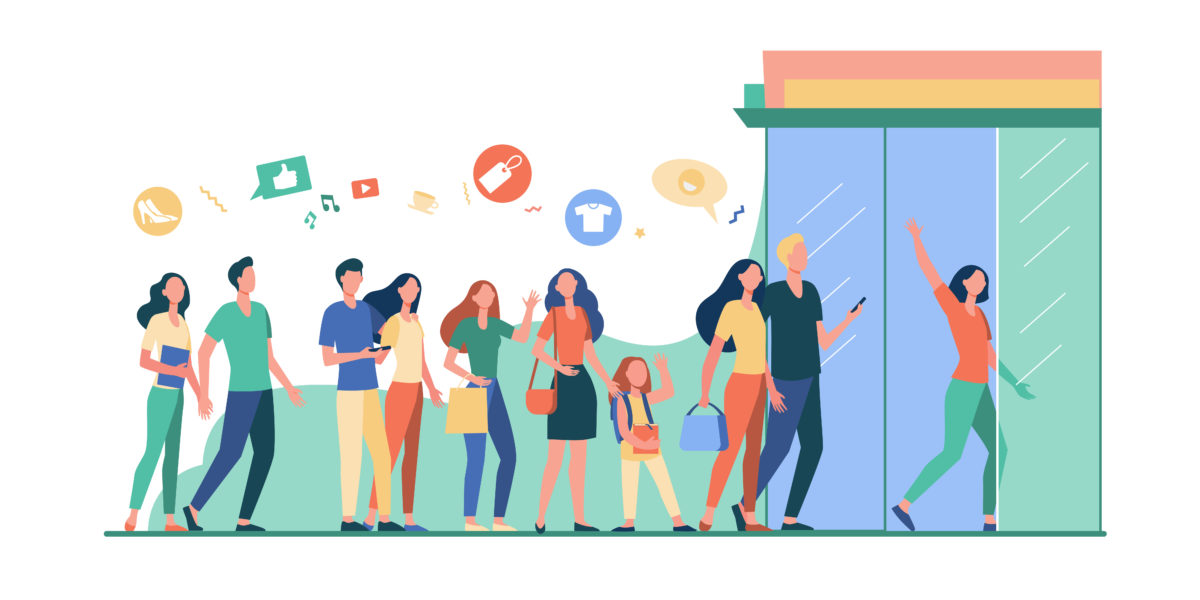

##**Customer Personality Analysis**<br><br><br>

**Group No:** 21 <br><br>
**Student Name:*W.M.N.P.Dissanayake* <br>
Registration Number:** EG/2021/4499<br>
**Student Name:*P.A.G.N.Rathnaweera* <br>
Registration Number:** EG/2021/4751  <br><br>

## Project Introduction

In this project, we employ K-Means and DBSCAN clustering algorithms to conduct a comprehensive Customer Personality Analysis on the provided dataset. By leveraging these algorithms, we aim to identify distinct customer segments based on their behaviors and preferences, allowing for a more targeted marketing approach. <br>

The K-Means algorithm facilitates the partitioning of customers into predefined clusters, while DBSCAN offers the advantage of discovering clusters of varying shapes and densities without the need for prior knowledge of the number of clusters.<br>

 We will evaluate the performance of these models using metrics such as silhouette score ensuring that our analysis not only enhances understanding of customer segments but also provides actionable insights for product modification and marketing strategies.

Data Link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

## **Literature Survey for Customer Personality Analysis Using Clustering Algorithms**


Customer Personality Analysis is essential for businesses aiming to tailor their products and marketing strategies to meet the diverse needs of their customer base. This literature survey examines existing research on customer segmentation, focusing on the application of clustering algorithms like K-Means and DBSCAN. The survey highlights methodologies, findings, challenges, and future directions in the realm of customer analysis.

**1. Customer Segmentation Techniques**



*   **Traditional Methods**: Early segmentation strategies relied heavily on demographic data such as age, gender, and income. Smith (1956) proposed a typology of market segmentation based on demographic factors, which laid the foundation for more complex methods.
*   **Behavioral and Psychographic Segmentation**: Recent studies emphasize the importance of behavioral (e.g., purchasing patterns) and psychographic (e.g., lifestyle, values) factors in segmentation. For instance, Wedel and Kamakura (2000) highlight that understanding consumer behavior leads to more meaningful segmentation.

**2. Clustering Algorithms**



*    **K-Means Clustering**-K-Means is one of the most commonly used clustering algorithms due to its simplicity and efficiency. It partitions data into K distinct clusters by minimizing the variance within each cluster.
*   **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**-identifies clusters based on the density of data points, allowing it to find arbitrarily shaped clusters and handle noise effectively.

**3. Model Evaluation Metrics**



*   Silhouette Score: This metric measures how similar an object is to its own cluster compared to other clusters. Rousseeuw (1987) introduced the silhouette coefficient as a way to evaluate the quality of clustering.In this sceanrio we use this approach.

**4. Applications in Marketing**



*   **Targeted Marketing:** Research by Kumar et al. (2013) demonstrates how businesses can leverage clustering to identify high-value customer segments, allowing for more targeted marketing strategies.
*   **Product Development:** Companies have utilized clustering to inform product development, tailoring offerings to meet the specific needs of identified customer segments (Farris et al., 2010).







## **DATASET DESCRIPTION**

**People**



*   ID: Customer's unique identifier
*   Year_Birth: Customer's birth year
*   Education: Customer's education level
*   Marital_Status: Customer's marital status
*   Income: Customer's yearly household income
*   Kidhome: Number of children in customer's household
*   Teenhome: Number of teenagers in customer's household
*   Dt_Customer: Date of customer's enrollment with the company
*   Recency: Number of days since customer's last purchase
*   Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br>




**Product**



*   MntWines: Amount spent on wine in last 2 years
*   MntFruits: Amount spent on fruits in last 2 years
*   MntMeatProducts: Amount spent on meat in last 2 years
*   MntFishProducts: Amount spent on fish in last 2 years
*   MntSweetProducts: Amount spent on sweets in last 2 years
*   MntGoldProds: Amount spent on gold in last 2 years




**Promotion**



*   NumDealsPurchases: Number of purchases made with a discount
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*  AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*  AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*  AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*  Response: 1 if customer accepted the offer in the last campaign, 0 otherwise






**Place**



*   NumWebPurchases: Number of purchases made through the company’s website
*  NumCatalogPurchases: Number of purchases made using a catalogue
*  NumStorePurchases: Number of purchases made directly in stores
*  NumWebVisitsMonth: Number of visits to company’s website in the last month





**Target**

Need to perform clustering to summarize customer segments


## **IMPORTING REQUIRED LIBRARIES**

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.cluster import KMeans
from google.colab import drive
from datetime import date
from datetime import datetime
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Description

In [3]:
# Step 2: Load the dataset


df = pd.read_csv("/content/drive/MyDrive/marketing_campaign_(1).csv", sep='\t')

data_prep = df.copy()


In [18]:
# Step 4: Add new features

# Calculate Age more accurately
today = pd.to_datetime('today')
df['Age'] = today.year - df['Year_Birth'] - ((today.month, today.day) < (df['Year_Birth'] % 100, df['Year_Birth'] // 100 % 100))

# Convert Dt_Customer to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Calculate customer tenure in years
days_in_year = pd.Timedelta(days=365.25)
df['Years_customer'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days // days_in_year



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,12
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,10
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,10


In [19]:
# Calculate total expenses and accepted campaign
df['Total_Expenses'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                        df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])
df['Total_Acc_Cmp'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] +
                       df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response'])


Overview of the Dataset:

In [20]:
# Step 5: Explore the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [21]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expenses,Total_Acc_Cmp
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214,0.446875
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288,0.890543
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,5.000000


In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(2240, 31)

In [24]:
print(f"Unique IDs: {df['ID'].nunique()}")

Unique IDs: 2240


In [25]:
print("Number of unique values in Z_CostContact column:", df['Z_CostContact'].nunique())
print("Number of unique values in Z_Revenue column:", df["Z_Revenue"].nunique())


Number of unique values in Z_CostContact column: 1
Number of unique values in Z_Revenue column: 1




*  Observations: 2,240 across 29 columns.
*  Missing Values: 24 in the 'income' column.
*  Column Types: Mostly numerical; three categorical: 'marital_status', 'education', 'Dt_customer' (to be converted to date).




Duplicates: None detected.


In [26]:
# Remove unnecessary columns ('Id' and columns with 1 unique value)
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)


In [27]:
#string format to a datetime format.
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
latest_date = df['Dt_Customer'].max()
df['Days_is_client'] = (latest_date - df['Dt_Customer']).dt.days






In [28]:
# Count values in categorical columns
categorical_columns = df.select_dtypes('object')

for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(value_counts)
    print("\n")

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




In [29]:
# Standardize 'Marital_Status' into 2 broader groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Standardize 'Education' into 3 broader groups
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')

for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")


Unique values in Education:
['Graduate' 'Postgraduate' 'Undergraduate']


Unique values in Marital_Status:
['Single' 'Partner']




In [30]:
# Combining columns together to reduce the number of dimensions

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [31]:
data = df.copy()
df = df[['Education', 'Marital_Status', 'Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses',
                 'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain', 'Response']]

In [32]:
# Step 6: Handle duplicate values
df.drop_duplicates(inplace=True)

# Remove rows with any missing values (NaN)
df.dropna(inplace=True)

df.shape

(2031, 11)

In [33]:
# Categorize columns into three groups based on their data type

binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]

In [ ]:
## Detecting Outliers
import pandas as pd
from scipy import stats
# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df[numerical_columns]), columns=numerical_columns)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


,Income,Days_is_client,Recency,Expenses,TotalNumPurchases
count,2031.000,2031.000,2031.000,2031.000,2031.000
mean,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.984,-1.743,-1.688,-0.999,-1.945
25%,-0.660,-0.863,-0.859,-0.893,-0.900
50%,-0.032,-0.003,0.004,-0.350,0.014
75%,0.634,0.867,0.867,0.729,0.797
max,24.058,1.713,1.730,3.176,3.801


In [ ]:
## Removing Outliers

# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the rows containing outliers
df = df.drop(outliers.index)

# **EDA**

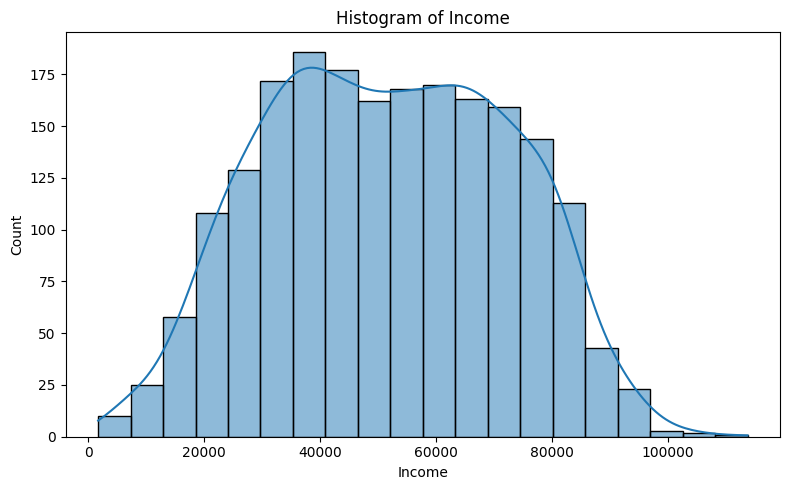

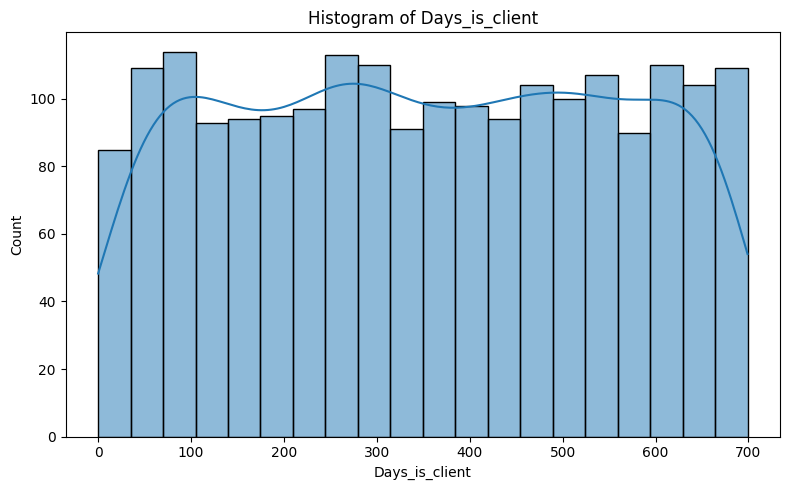

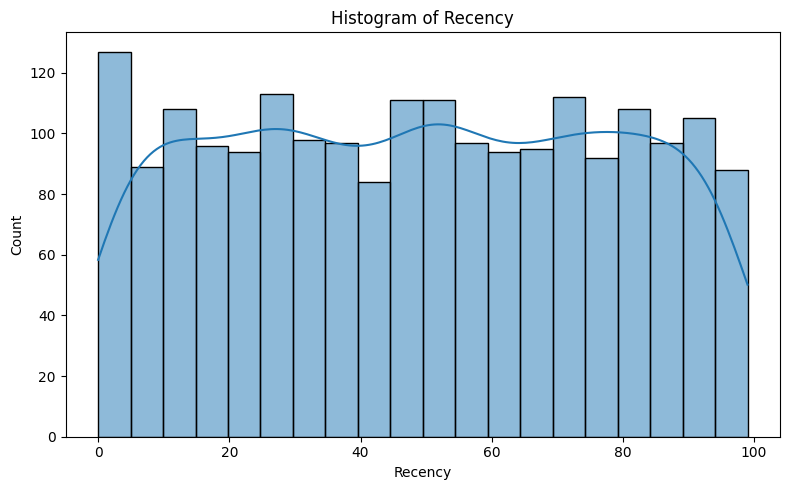

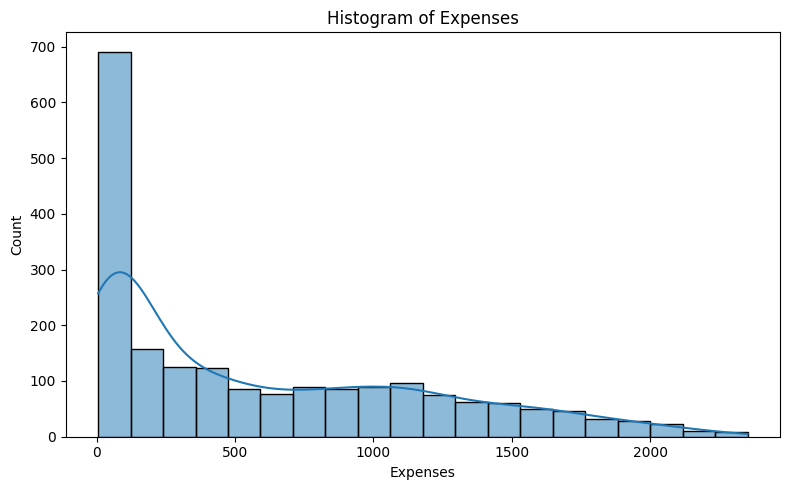

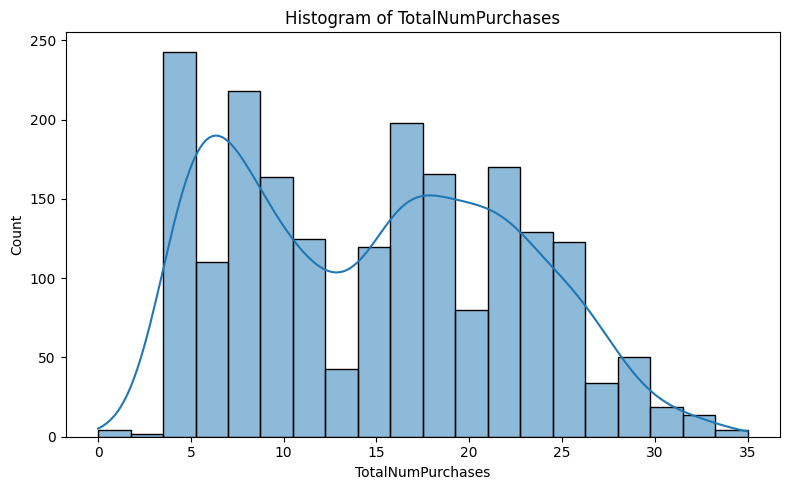

In [ ]:
# Plot histograms for each numerical column
for column in numerical_columns:

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

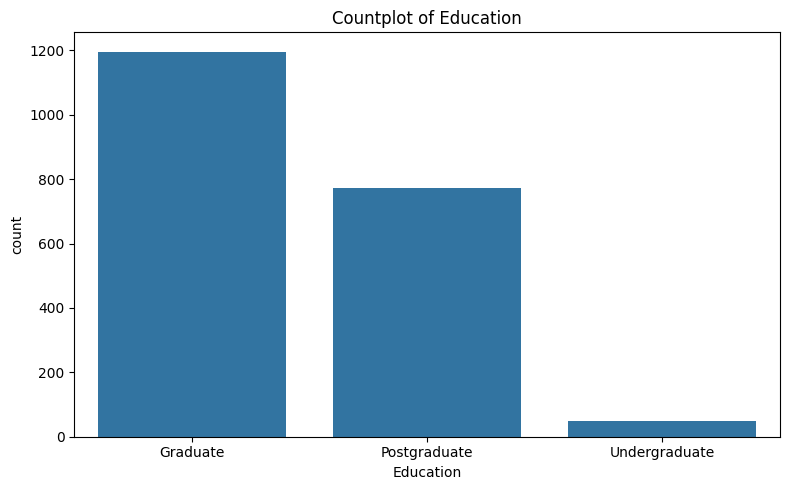

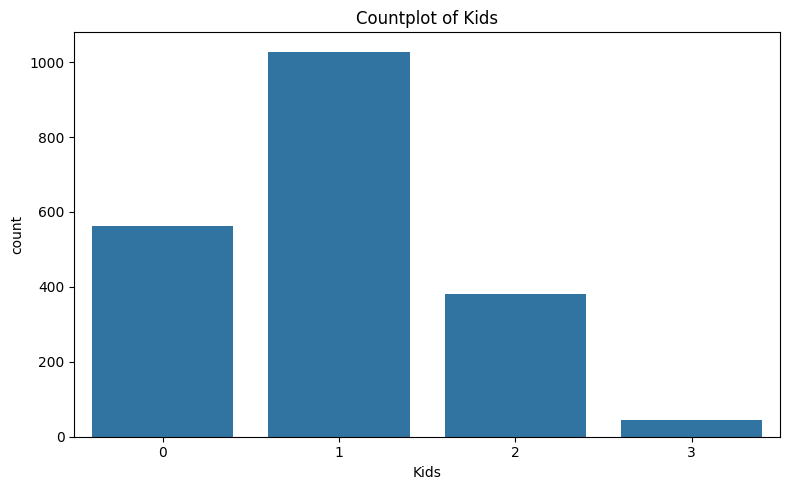

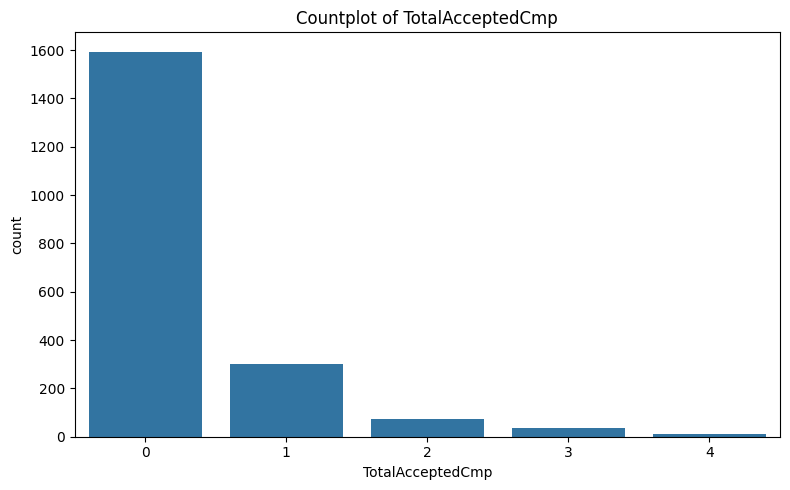

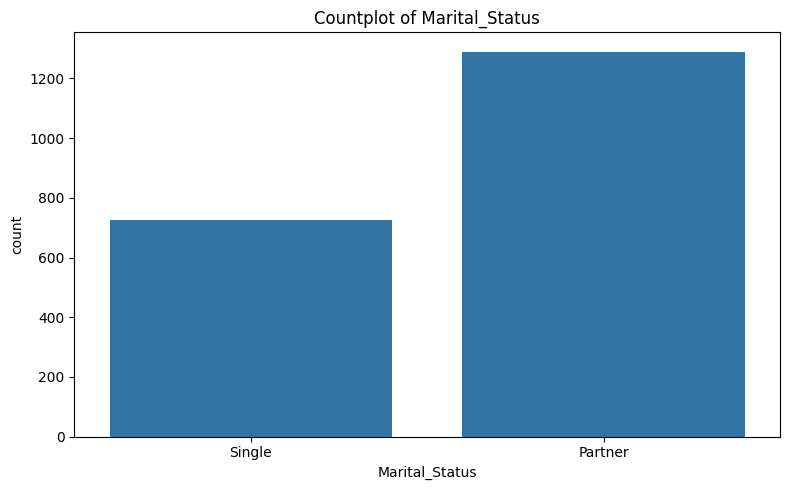

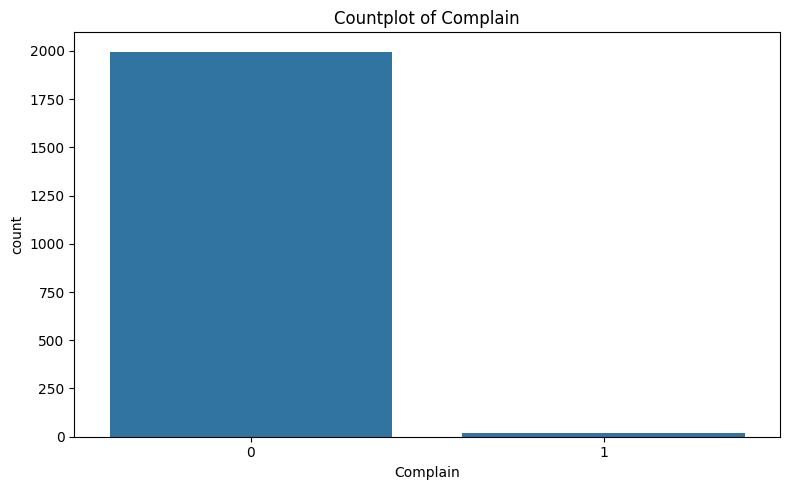

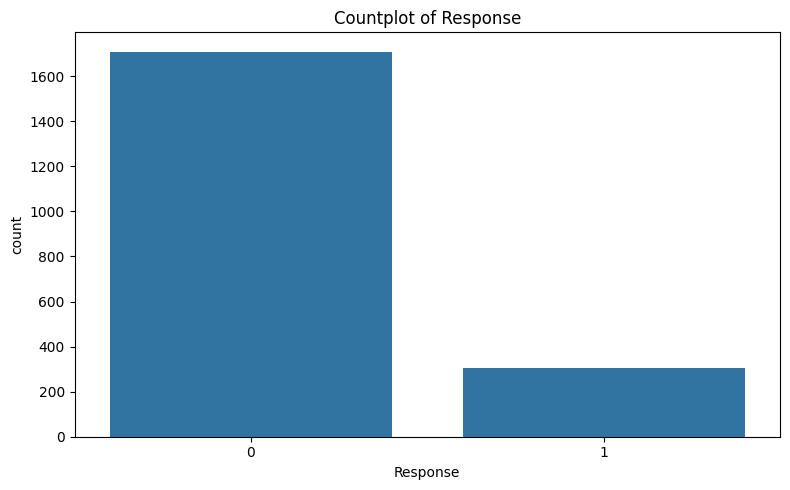

In [ ]:
# Plot countplots for each categorical column
for column in categorical_columns + binary_columns:

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    plt.tight_layout()
    plt.show()

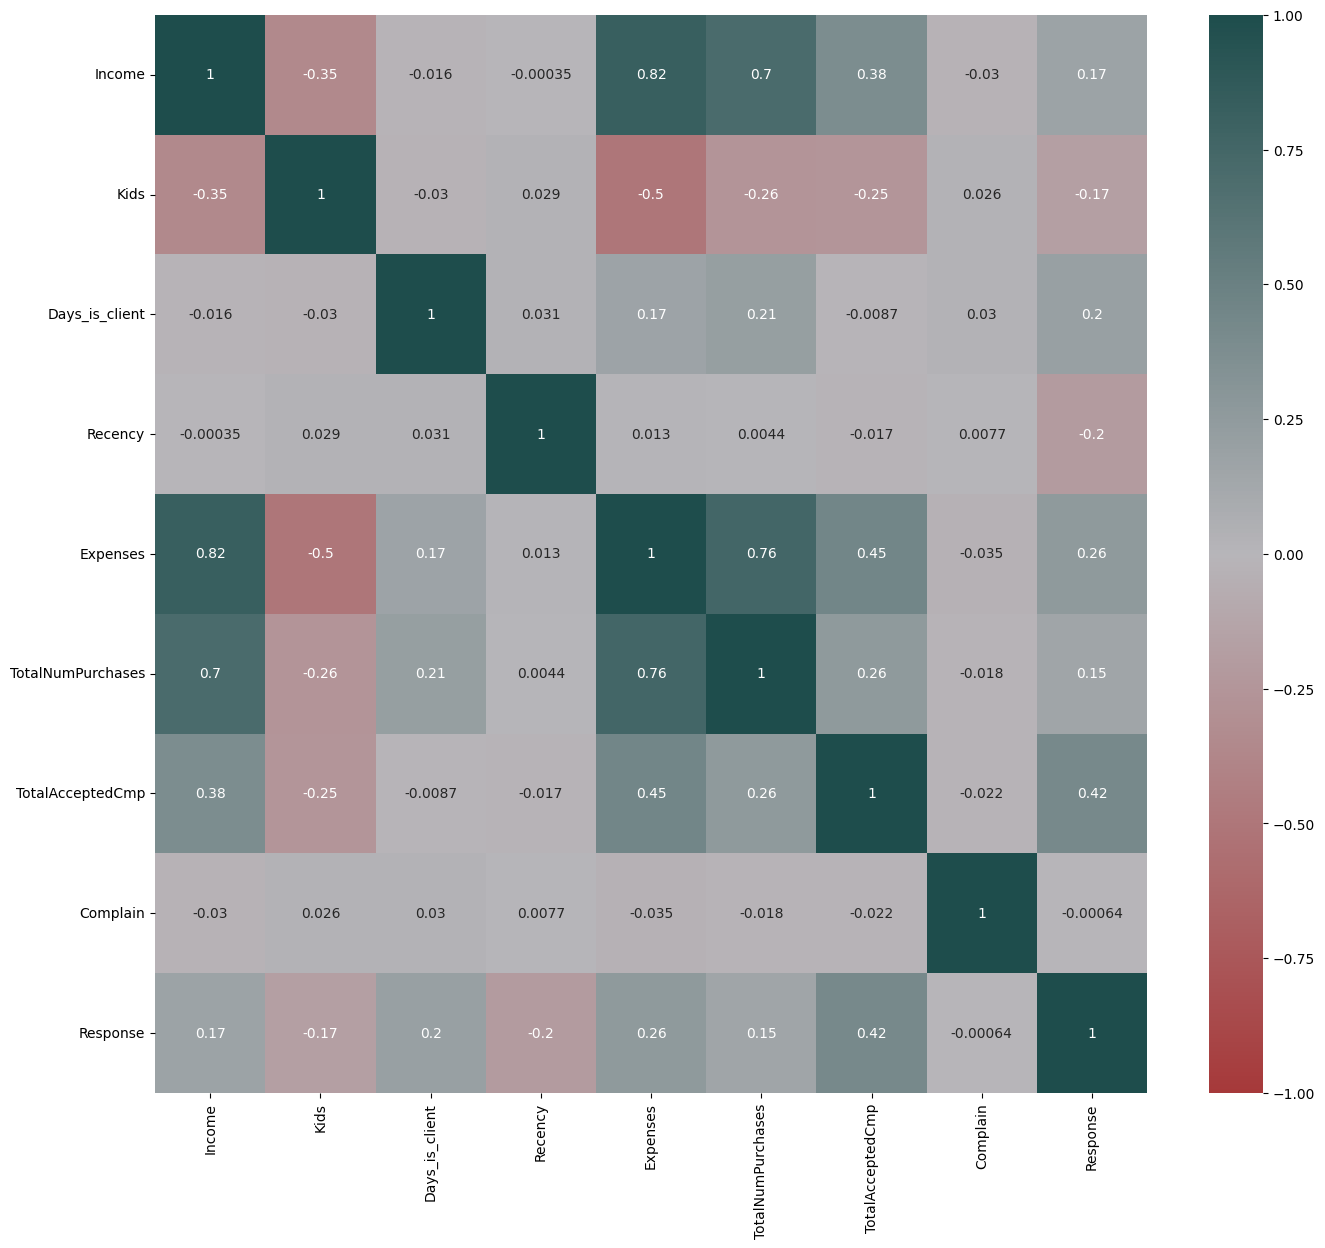

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["#A6393A", "#B7B5B9", "#1E4D4C"]

cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

# DATA PREPROCESSING

In [ ]:
# Step 3: Clean and rename columns
df.columns = df.columns.str.strip()


In [ ]:
print(df.isna().sum()) #

Education            0
Marital_Status       0
Income               0
Kids                 0
Days_is_client       0
Recency              0
Expenses             0
TotalNumPurchases    0
TotalAcceptedCmp     0
Complain             0
Response             0
dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Apply one-hot encoding directly with pandas
categorical_columns = df.select_dtypes(include=['object']).columns


X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

In [ ]:
# Instantiate Scaler
scaler = StandardScaler()

# fit_transform
X_scaled = scaler.fit_transform(X_encoded)
X_scaled.shape

(2016, 12)

# Model Implementation

K-means Clusturing

In [ ]:
# Initialize the KMeans algorithm with 2 clusters and a maximum of 50 iterations
kmeans = KMeans(n_clusters=2, max_iter=50)

# Fit the KMeans algorithm
kmeans.fit(X_scaled)
y_kmeans = kmeans.fit_predict(X_scaled)

# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

In [ ]:
pd.DataFrame(X_transformed, columns=X_encoded.columns).head()

,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,0.0,663.0,58.0,1617.0,25.0,0.0,0.0,1.0,0.0,0.0,1.0
1,46344.0,2.0,113.0,38.0,27.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0
2,71613.0,0.0,312.0,26.0,776.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26646.0,1.0,139.0,26.0,53.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58293.0,1.0,161.0,94.0,422.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0


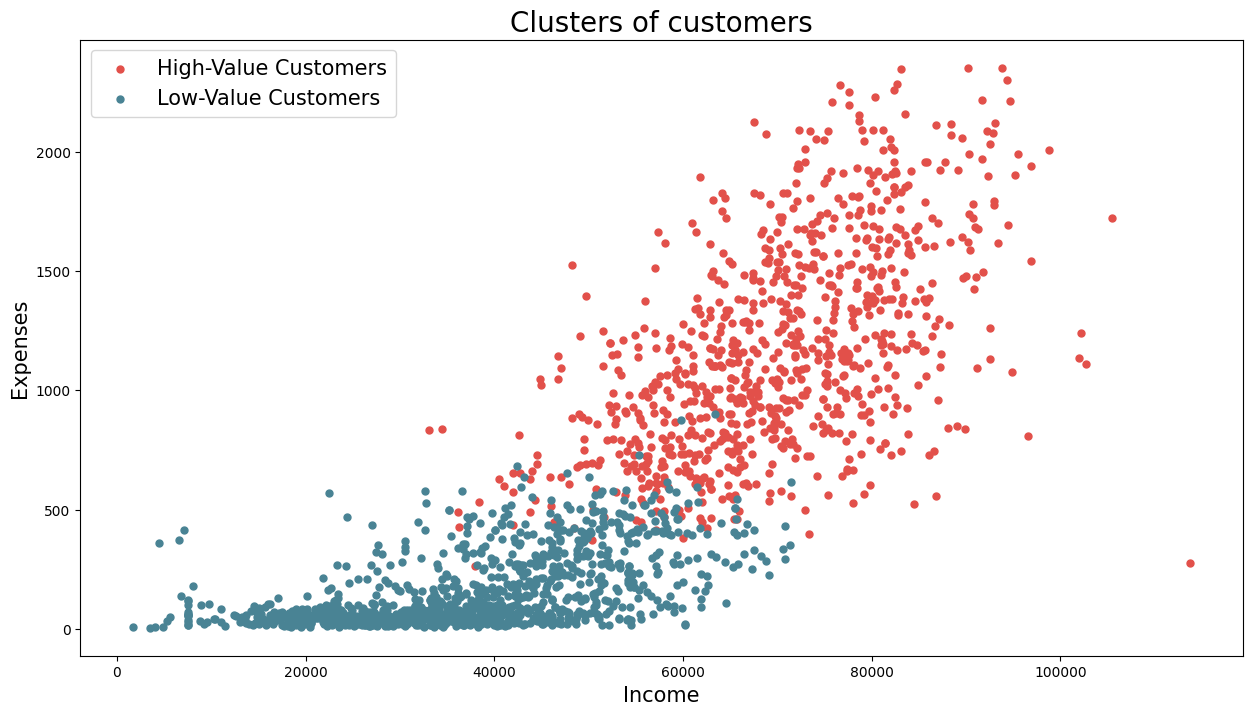

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(15, 8))

# Plot the customers in Cluster 0 (High-Value Customers), using red color
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 4], s=25, c='#E2504A', label='High-Value Customers')

# Plot the customers in Cluster 1 (Low-Value Customers), using blue color
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 4], s=25, c='#498394', label='Low-Value Customers')

# Add title to the plot
plt.title('Clusters of customers', fontsize=20)

# Add label for the x-axis (Income)
plt.xlabel('Income', fontsize=15)

# Add label for the y-axis (Expenses)
plt.ylabel('Expenses', fontsize=15)

# Show the legend to identify each cluster
plt.legend(fontsize=15)

# Display the plot
plt.show()


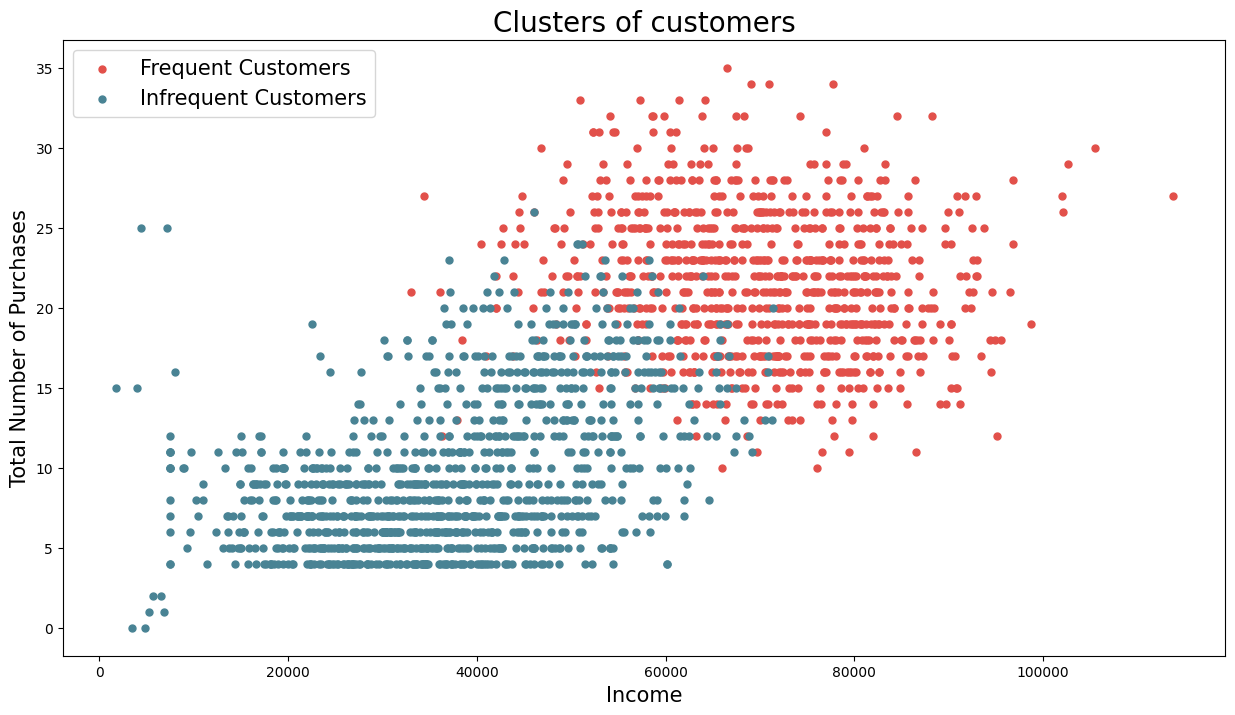

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(15, 8))

# Plot the customers in Cluster 0 (Frequent Customers), using red color
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 5], s=25, c='#E2504A', label='Frequent Customers')

# Plot the customers in Cluster 1 (Infrequent Customers), using blue color
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 5], s=25, c='#498394', label='Infrequent Customers')

# Add title to the plot
plt.title('Clusters of customers', fontsize=20)

# Add label for the x-axis (Income)
plt.xlabel('Income', fontsize=15)

# Add label for the y-axis (Total Number of Purchases)
plt.ylabel('Total Number of Purchases', fontsize=15)

# Show the legend to identify each cluster
plt.legend(fontsize=15)

# Display the plot
plt.show()


Clusters: 2, SSD: 19379.722198840325
Clusters: 3, SSD: 17291.198594527254
Clusters: 4, SSD: 16175.825865861294
Clusters: 5, SSD: 14504.627886453645
Clusters: 6, SSD: 13788.15318575316
Clusters: 7, SSD: 12972.039544842759
Clusters: 8, SSD: 11353.718321851477
Clusters: 9, SSD: 10501.337006383654
Clusters: 10, SSD: 10214.141674617058
The elbow point (optimal number of clusters) is: 8


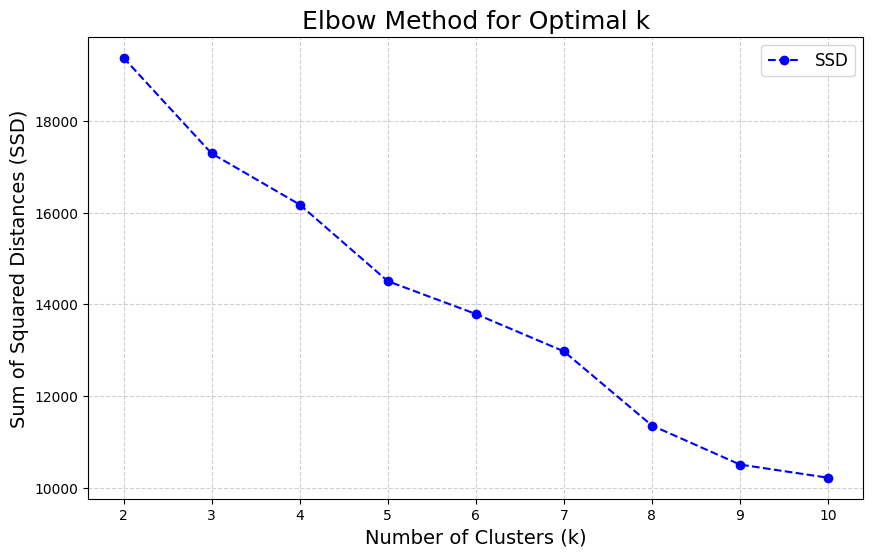

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow-curve/SSD
ssd = []  # List to store the Sum of Squared Distances (SSD) for each k
range_n_clusters = range(2, 11)  # Range of k values from 2 to 10 for better insights

# Loop over the range of number of clusters (k)
for num_clusters in range_n_clusters:
    # Initialize the KMeans algorithm with current number of clusters and 300 maximum iterations
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300, random_state=101)

    # Fit the KMeans model to the scaled data (X_scaled)
    kmeans.fit(X_scaled)

    # Append the inertia (SSD) for the current number of clusters to the list
    ssd.append(kmeans.inertia_)

    # Print the k value and its corresponding SSD
    print(f"Clusters: {num_clusters}, SSD: {kmeans.inertia_}")

# Find the "elbow" point (where SSD starts to decrease less dramatically)
# Compute the rate of change in SSD between consecutive points
ssd_diff = [ssd[i] - ssd[i-1] for i in range(1, len(ssd))]  # Difference between SSDs
ssd_diff_diff = [ssd_diff[i] - ssd_diff[i-1] for i in range(1, len(ssd_diff))]  # 2nd derivative (change in the rate)

# The elbow is where the second derivative is the smallest (change in slope)
elbow_point = range_n_clusters[2 + ssd_diff_diff.index(min(ssd_diff_diff))]  # Add 2 because of indexing

print(f"The elbow point (optimal number of clusters) is: {elbow_point}")

# Plot the SSD values for each number of clusters (k)
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.plot(range_n_clusters, ssd, marker='o', linestyle='--', color='b', label="SSD")  # Plot SSD vs k with markers

# Add labels and title to the plot
plt.title('Elbow Method for Optimal k', fontsize=18)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Sum of Squared Distances (SSD)', fontsize=14)
plt.xticks(range_n_clusters)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show the plot
plt.show()


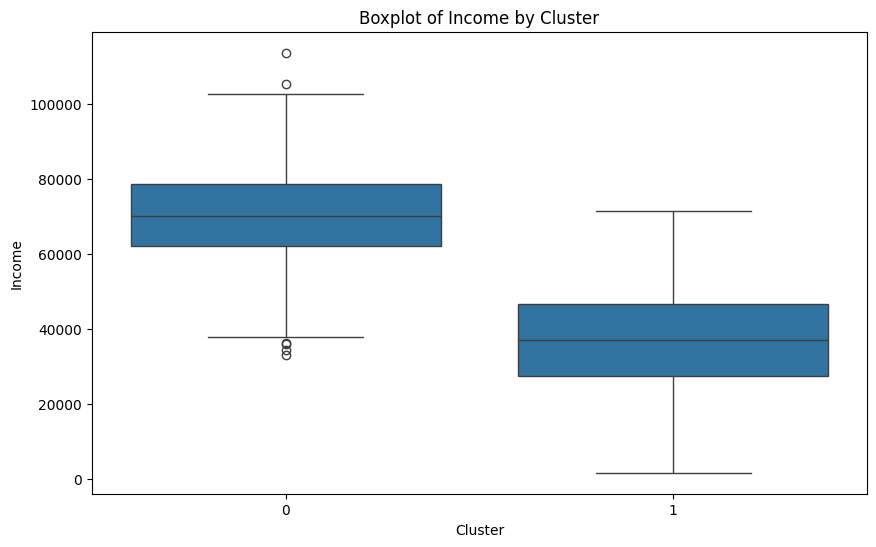

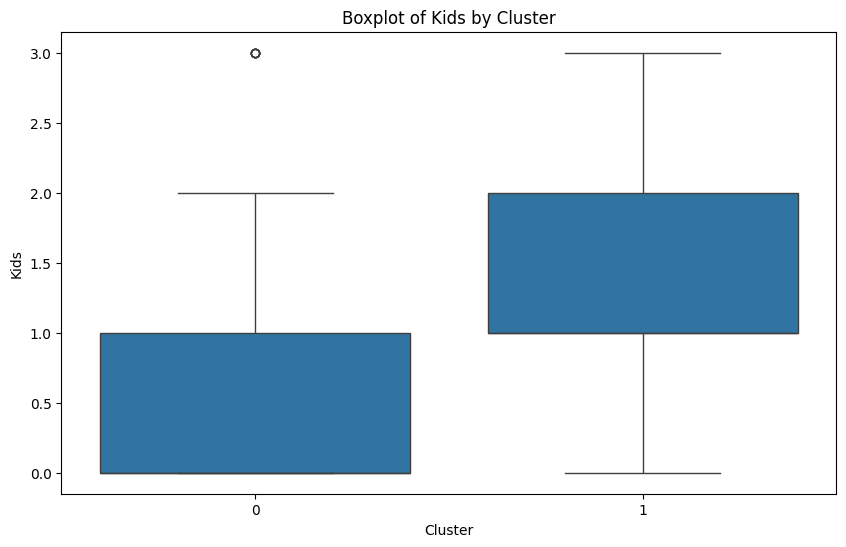

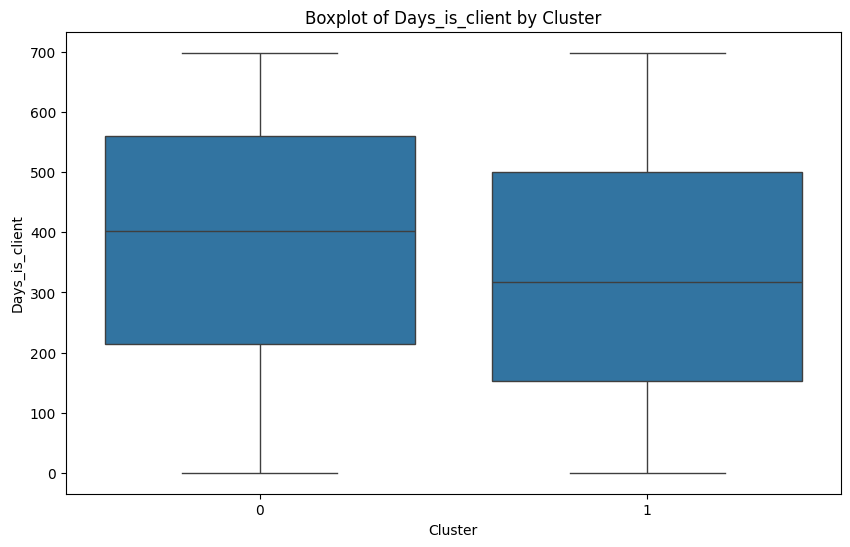

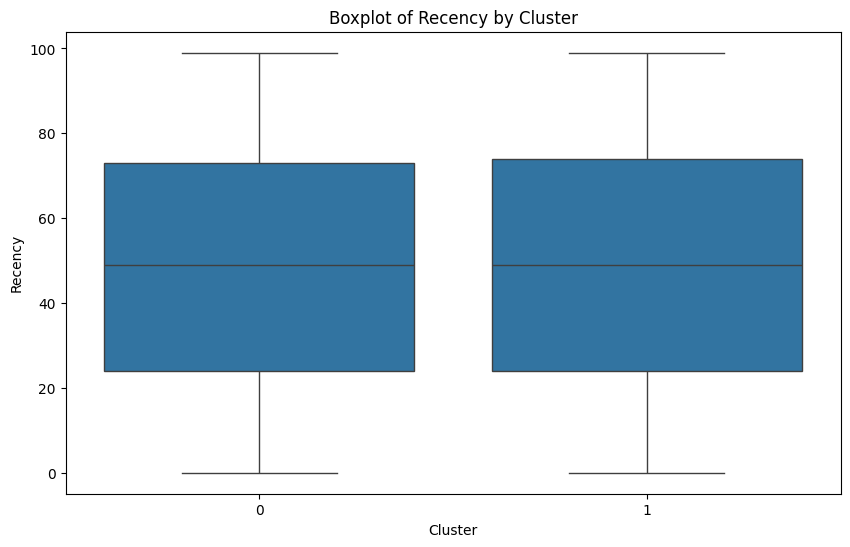

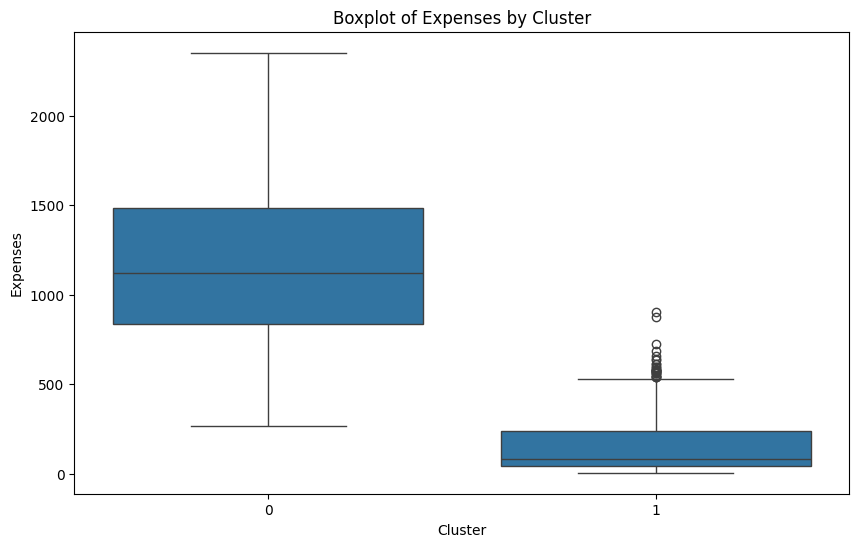

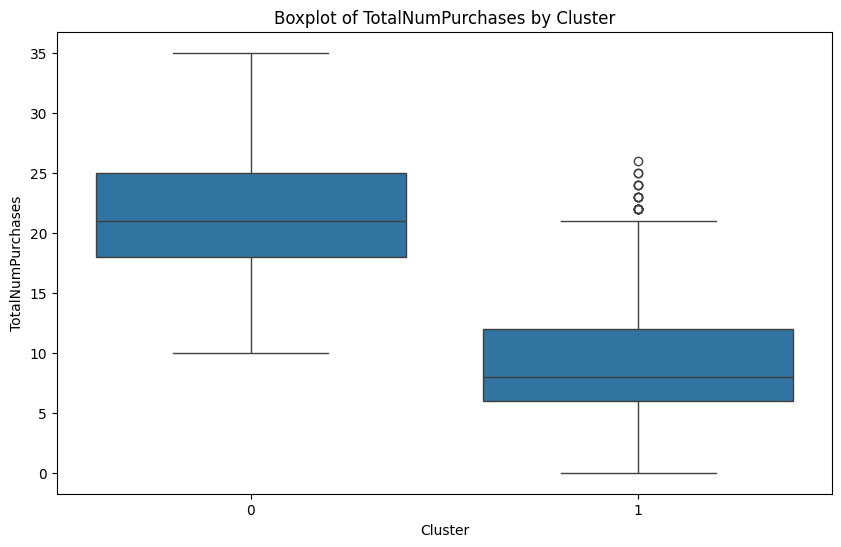

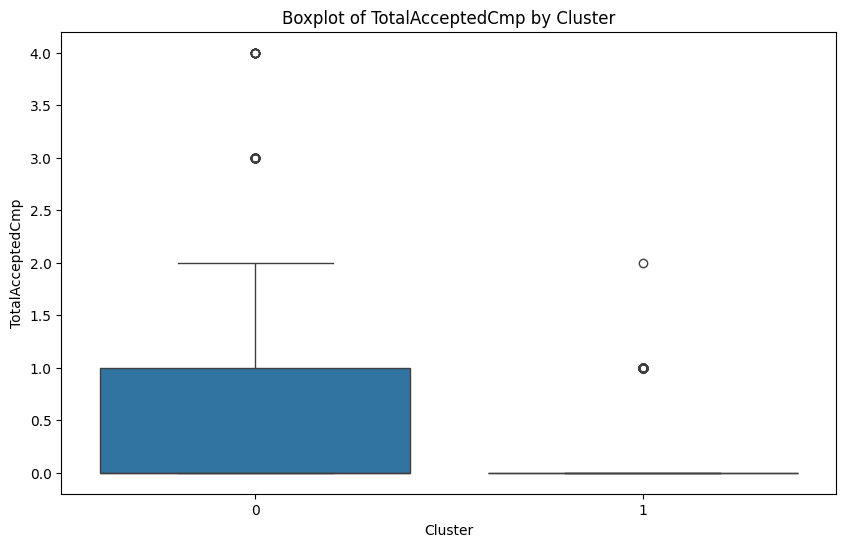

In [ ]:
# Create a copy of the original DataFrame and add a new column 'Cluster'
df_clusters = df.copy()
df_clusters['Cluster'] = y_kmeans

# Select numerical columns to plot
columns_to_plot = ['Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp']

# Plot boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_clusters)  # Adjust palette as needed
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

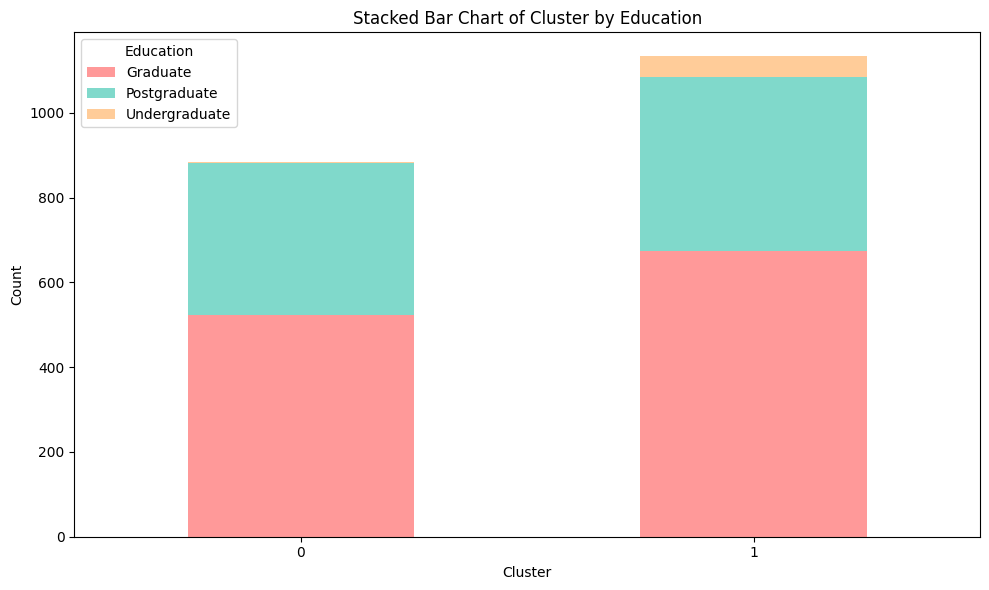

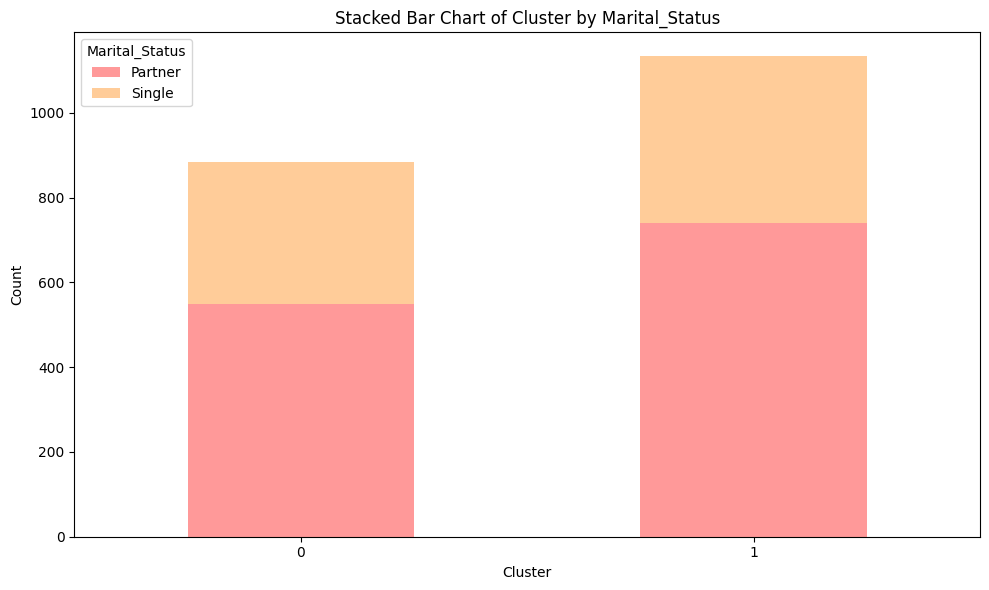

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define a custom color palette
custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)

# Assuming df_clusters is your DataFrame
# List of categorical columns to plot
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    # Prepare data
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)

    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)

    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


## DBSCAN CLUSTURING

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # For normalizing data
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA  # For reducing dimensions
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


In [ ]:
# Step 1: Data Preprocessing
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)    ##for non-ordinal categories


In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # omputes the mean and standard deviation for each feature

In [ ]:
# Before running the function

#prints the shape and summary statistics of the scaled datase
print("Data shape:", X_scaled.shape)
print("Data summary:")
print(pd.DataFrame(X_scaled).describe())

Data shape: (2016, 12)
Data summary:
                 0             1             2             3             4   \
count  2.016000e+03  2.016000e+03  2.016000e+03  2.016000e+03  2.016000e+03   
mean   9.163746e-17 -3.172066e-17 -1.312883e-16  4.317534e-17 -3.788856e-17   
std    1.000248e+00  1.000248e+00  1.000248e+00  1.000248e+00  1.000248e+00   
min   -2.417088e+00 -1.280487e+00 -1.740817e+00 -1.686541e+00 -1.003086e+00   
25%   -7.862872e-01 -1.280487e+00 -8.619271e-01 -8.584598e-01 -8.956536e-01   
50%   -1.194858e-02  6.192685e-02 -5.255982e-03  4.124660e-03 -3.467403e-01   
75%    7.981254e-01  6.192685e-02  8.711655e-01  8.667091e-01  7.380769e-01   
max    3.006357e+00  2.746755e+00  1.710555e+00  1.729294e+00  2.936668e+00   

                 5             6             7             8             9   \
count  2.016000e+03  2.016000e+03  2.016000e+03  2.016000e+03  2.016000e+03   
mean   5.198663e-17  1.762259e-17 -1.057355e-17 -3.524518e-18  1.304071e-16   
std    1.00024

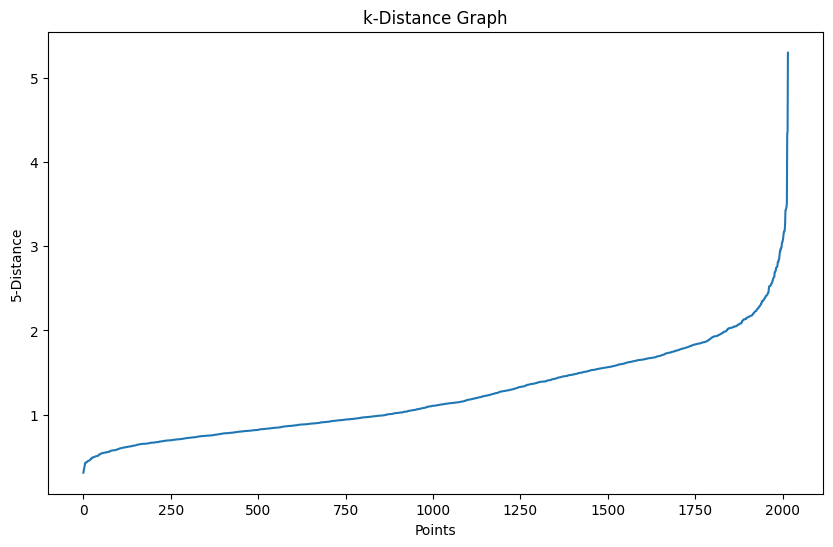

In [ ]:
from sklearn.neighbors import NearestNeighbors  ## identifying the optimal value for eps
import matplotlib.pyplot as plt
import numpy as np

def k_distance_plot(X, k=5):
    nearest_neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = nearest_neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    sorted_distances = np.sort(distances[:, -1])
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-Distance')
    plt.title('k-Distance Graph')
    plt.show()

k_distance_plot(X_scaled, k=5)


In [ ]:
# Step 2: Implement DBSCAN Algorithm
from sklearn.cluster import DBSCAN

# Adjust eps and min_samples as per dataset for optimal results
dbscan = DBSCAN(eps=3, min_samples=11, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_scaled)

# Verify that the lengths match
print("Length of original DataFrame:", len(df))
print("Length of DBSCAN labels:", len(dbscan_labels))

# Add cluster labels to the DataFrame
if len(df) == len(dbscan_labels):
    df_clusters = df.copy()
    df_clusters['Cluster'] = dbscan_labels
else:
    # Adjust df to match X_scaled
    df_clusters = df.iloc[:len(dbscan_labels)].copy()
    df_clusters['Cluster'] = dbscan_labels

print(df_clusters.head())


Length of original DataFrame: 2016
Length of DBSCAN labels: 2016
      Education Marital_Status   Income  Kids  Days_is_client  Recency  \
0      Graduate         Single  58138.0     0             663       58   
1      Graduate         Single  46344.0     2             113       38   
2      Graduate        Partner  71613.0     0             312       26   
3      Graduate        Partner  26646.0     1             139       26   
4  Postgraduate        Partner  58293.0     1             161       94   

   Expenses  TotalNumPurchases  TotalAcceptedCmp  Complain  Response  Cluster  
0      1617                 25                 0         0         1        0  
1        27                  6                 0         0         0        0  
2       776                 21                 0         0         0        0  
3        53                  8                 0         0         0        0  
4       422                 19                 0         0         0        0  


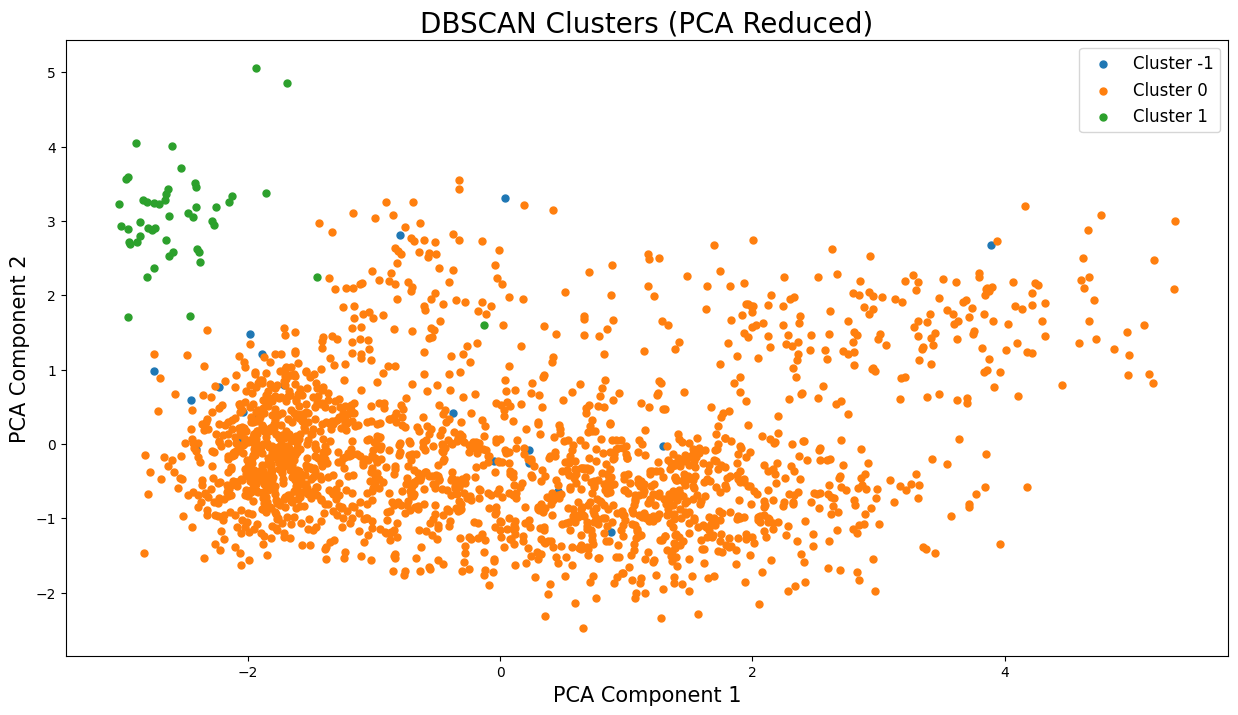

In [ ]:
# Step 3: Visualize Clusters Using PCA
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 8))
unique_labels = np.unique(dbscan_labels)

# Plot each cluster
for label in unique_labels:
    mask = dbscan_labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {label}', s=25)

plt.title('DBSCAN Clusters (PCA Reduced)', fontsize=20)
plt.xlabel('PCA Component 1', fontsize=15)
plt.ylabel('PCA Component 2', fontsize=15)
plt.legend(fontsize=12)
plt.show()


In [ ]:
print(df_clusters.columns)


Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Days_is_client',
       'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp',
       'Complain', 'Response', 'Cluster'],
      dtype='object')


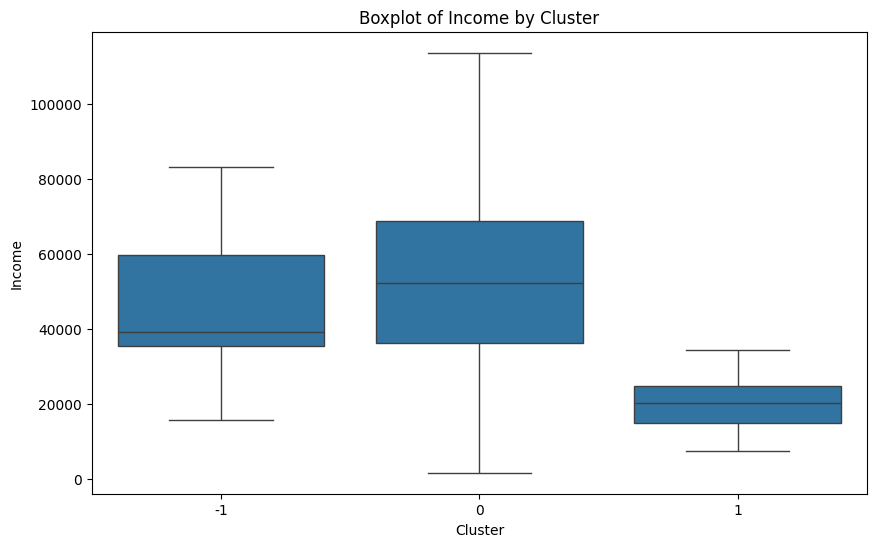

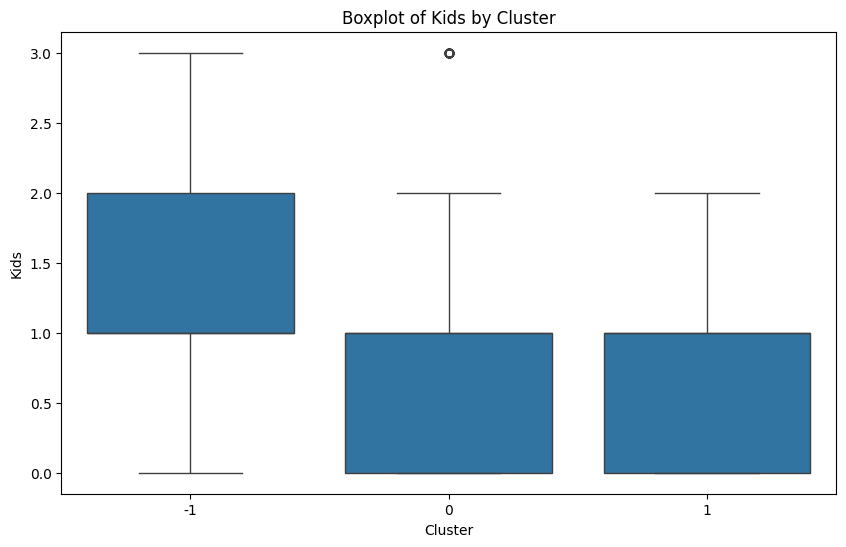

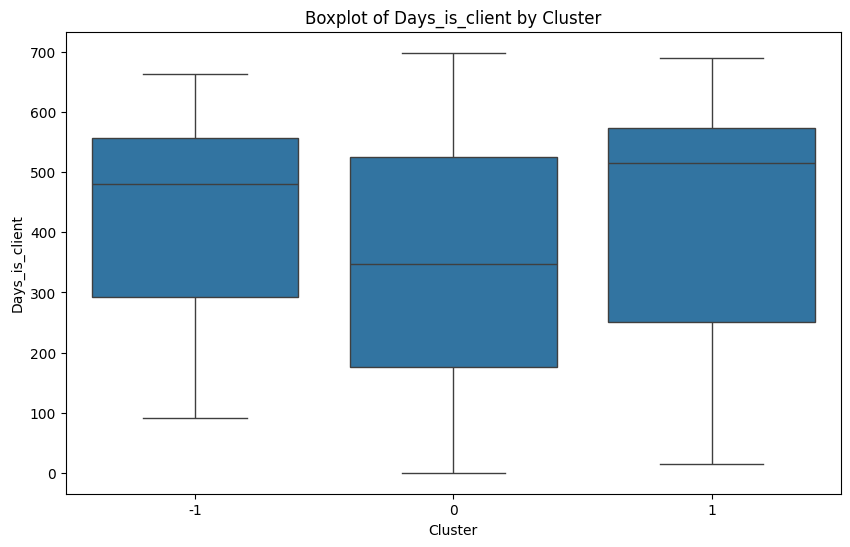

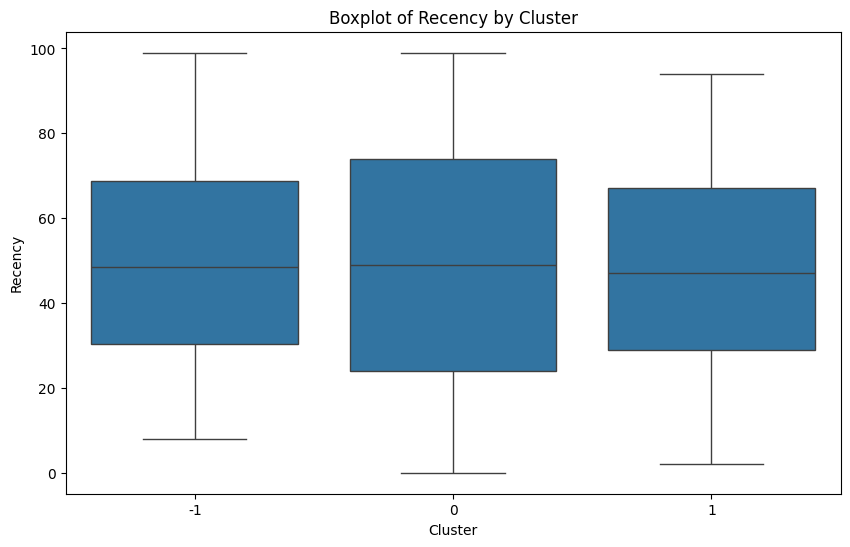

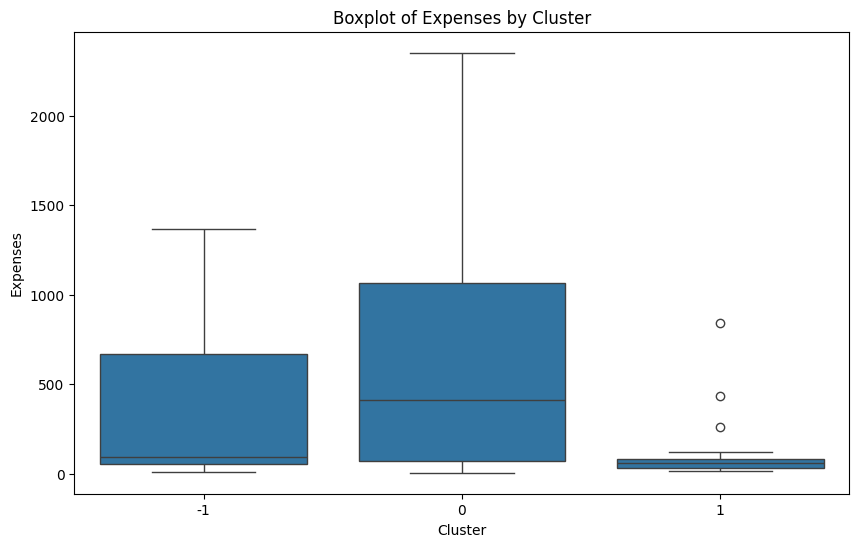

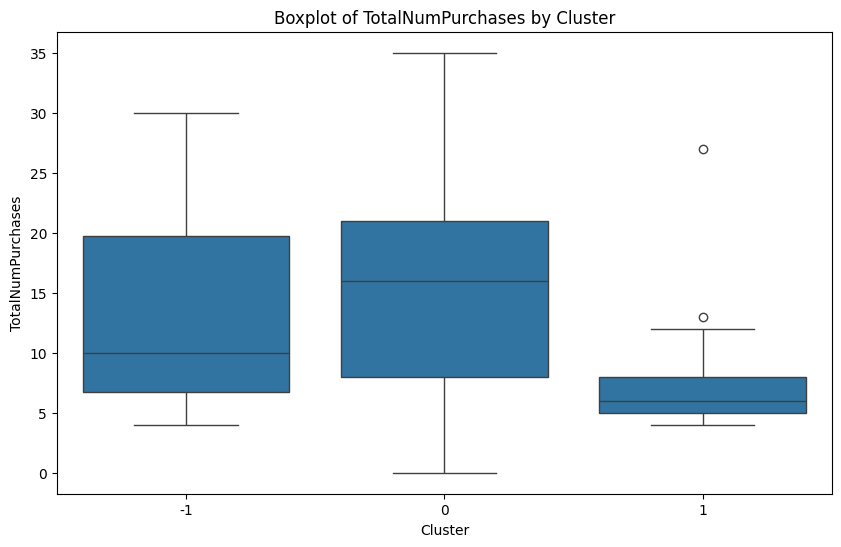

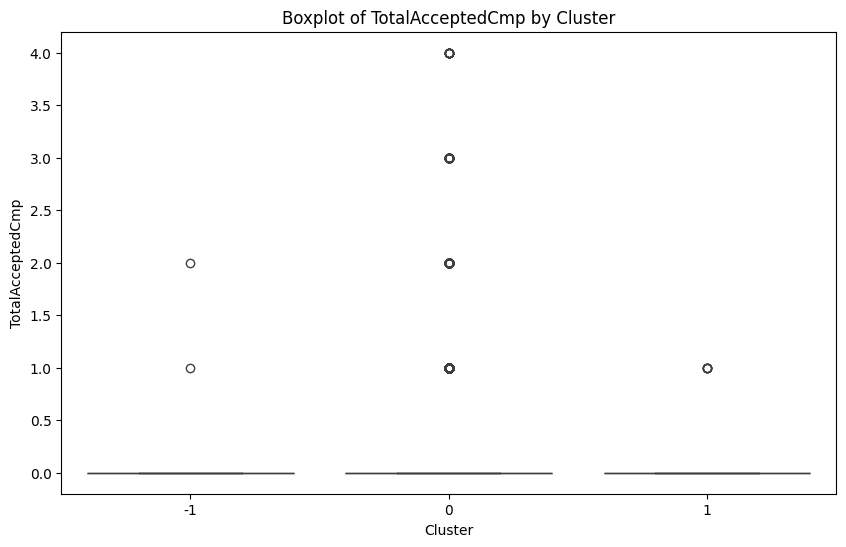

In [ ]:
# Ensure 'Kids' column exists
if 'Kids' not in df_clusters.columns:
    df_clusters['Kids'] = df_clusters['Kidhome'] + df_clusters['Teenhome']

# Numerical columns for analysis
numerical_columns = ['Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp']

# Boxplot analysis
for column in numerical_columns:
    if column in df_clusters.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Cluster', y=column, data=df_clusters)
        plt.title(f'Boxplot of {column} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(column)
        plt.show()
    else:
        print(f"Column '{column}' is not in the DataFrame.")


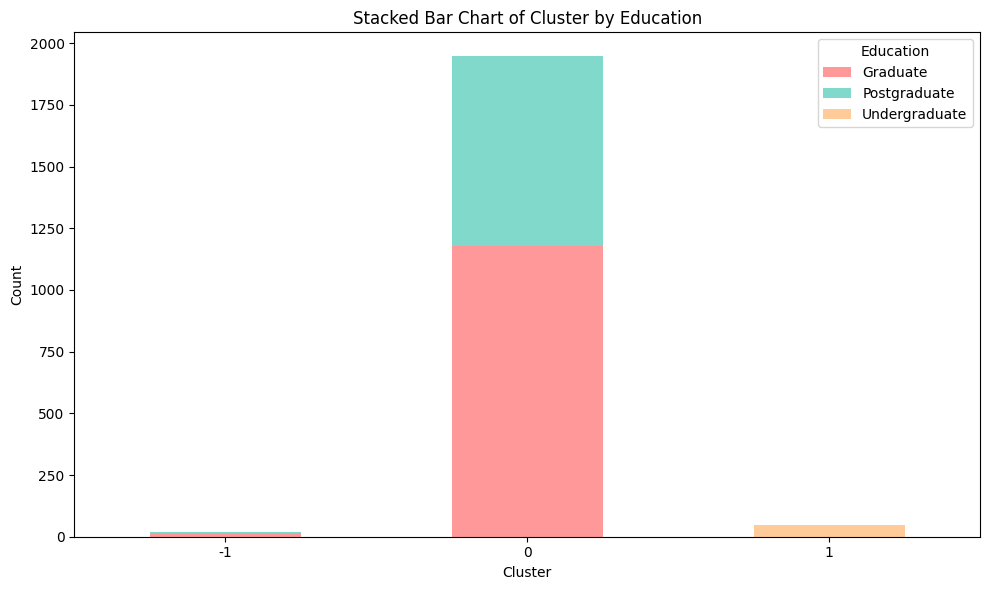

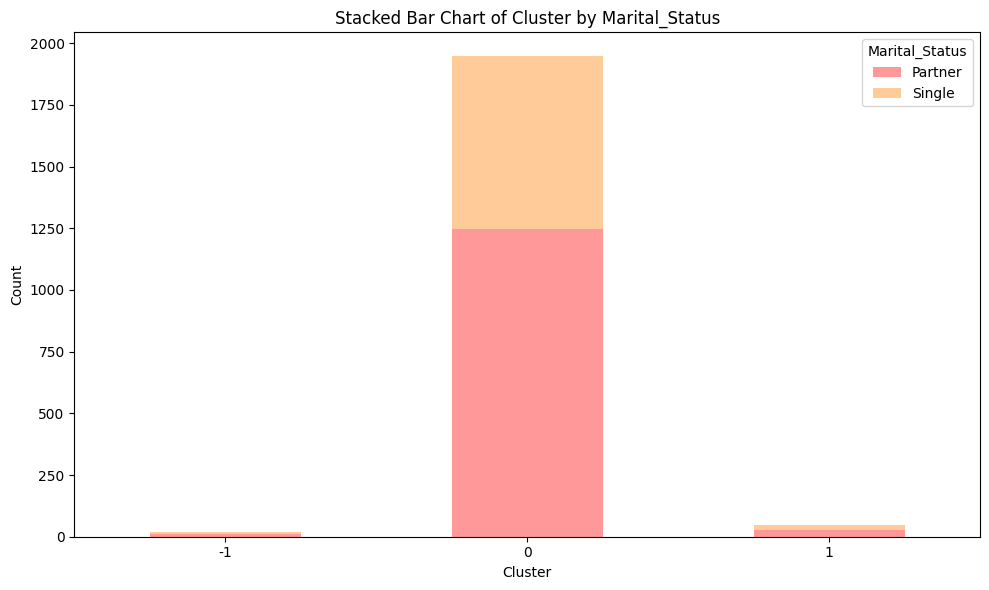

In [ ]:
# Step 5: Stacked Bar Chart for Categorical Features
categorical_columns = ['Education', 'Marital_Status']

# Define a custom color palette
custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)

for column in categorical_columns:
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)
    data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)
    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# MODEL EVALUATION

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for K-Means
silhouette_kmeans = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

# Ensure DBSCAN labels do not include noise (-1) for silhouette score calculation
# Only clusters with valid labels are considered
if len(np.unique(dbscan_labels)) > 1 and -1 in dbscan_labels:
    dbscan_valid_labels = dbscan_labels[dbscan_labels != -1]
    dbscan_valid_data = X_scaled[dbscan_labels != -1]
    silhouette_dbscan = silhouette_score(dbscan_valid_data, dbscan_valid_labels)
else:
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)

print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")


Silhouette Score for K-Means: 0.20401960099536084
Silhouette Score for DBSCAN: 0.45804109515045105


In [7]:
!ls /content


drive  sample_data


In [8]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 16396280787748138346112060902636.jpg	       'EG_2021_4499_DISSANAYAKE WMNP.pdf'
 16396281868744155545940694832527.jpg	       'EG_2021_4499 (ME Q2).pdf'
 16396282133128086035586991773696.jpg	       'EG_2021_4499 (ME QUIZ).pdf'
 20220819_063151.heic			       'EG_2021_4499 .pdf'
'23rd_Batch_Group_D_Asse_Ass_4499 .pdf'         event_dataset_new.csv
'23rd_Batch_Group_D_Detail_Drawing_4499 .pdf'   ExcuseLetter..pdf
'23rd_Batch_Group_D_Ortho_Ass_4499 (1).pdf'     Isoview_ex1_4499.pdf
 24rd_Batch_Group_D_Sec_View_4499.pdf	        Isoview_Ex2_4499.pdf
'4499 Dissanayake WMNP .pdf'		       'marketing_campaign_(1).csv'
'Colab Notebooks'			        Screenshot_20220629-202315_BOC.jpg
'EG_2021_4499(Dissanayake WMNP) (1).pdf'        SSD2022_mod1_A1_EG_4499.pdf
'EG_2021_4499_DISSANAYAKE WMNP (1).pdf'         synthetic_event_recommendation_dataset.csv
'EG_2021_4499(Dissanayake

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!ls /content/drive/MyDrive


 16396280787748138346112060902636.jpg	       'EG_2021_4499_DISSANAYAKE WMNP.pdf'
 16396281868744155545940694832527.jpg	       'EG_2021_4499 (ME Q2).pdf'
 16396282133128086035586991773696.jpg	       'EG_2021_4499 (ME QUIZ).pdf'
 20220819_063151.heic			       'EG_2021_4499 .pdf'
'23rd_Batch_Group_D_Asse_Ass_4499 .pdf'         event_dataset_new.csv
'23rd_Batch_Group_D_Detail_Drawing_4499 .pdf'   ExcuseLetter..pdf
'23rd_Batch_Group_D_Ortho_Ass_4499 (1).pdf'     Isoview_ex1_4499.pdf
 24rd_Batch_Group_D_Sec_View_4499.pdf	        Isoview_Ex2_4499.pdf
'4499 Dissanayake WMNP .pdf'		       'marketing_campaign_(1).csv'
'Colab Notebooks'			        Screenshot_20220629-202315_BOC.jpg
'EG_2021_4499(Dissanayake WMNP) (1).pdf'        SSD2022_mod1_A1_EG_4499.pdf
'EG_2021_4499_DISSANAYAKE WMNP (1).pdf'         synthetic_event_recommendation_dataset.csv
'EG_2021_4499(Dissanayake WMNP).pdf'	        user_dataset_new.csv


In [13]:
!ls /content/drive/MyDrive/Colab\ Notebooks


Untitled	 Untitled1.ipynb  Untitled3.ipynb  Untitled5.ipynb  Untitled7.ipynb
Untitled0.ipynb  Untitled2.ipynb  Untitled4.ipynb  Untitled6.ipynb  Untitled8.ipynb


In [14]:
!cp /content/ML_Project.ipynb /content/drive/MyDrive/Colab\ Notebooks/ML_Project.ipynb


cp: cannot stat '/content/ML_Project.ipynb': No such file or directory


In [15]:
!cp /content/Untitled1.ipynb /content/drive/MyDrive/Colab\ Notebooks/Untitled1.ipynb


cp: cannot stat '/content/Untitled1.ipynb': No such file or directory


In [16]:

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!cp /content/Untitled1.ipynb /content/drive/MyDrive/Colab\ Notebooks/Untitled1.ipynb


cp: cannot stat '/content/Untitled1.ipynb': No such file or directory


# **CONCLUSION**




**1.   K-Means Clustering**



*   Silhouette Score: 0.195
*   The low Silhouette Score indicates that the clusters formed by K-Means are not well-separated or cohesive.

*  The requirement to specify the number of clusters (n_clusters) beforehand could limits its adaptability to complex customer behaviors.


**2.   DBSCAN Clustering**



*   The moderate Silhouette Score indicates that DBSCAN performs better than K-Means in identifying distinct clusters.
*   Effectively captures clusters of varying shapes and densities.<br><br><br>





Therefore the final conclusion is that,<br><br>
DBSCAN outperforms K-Means in this analysis, adapting well to irregular data distributions and identifying meaningful clusters and noise. This makes it a more suitable choice for understanding intricate customer segments and deriving actionable insights for tailored marketing strategies.







# **REFERENCES**




1.   Davies, D. L., & Bouldin, D. W. (1979). A Cluster Separation Measure. IEEE Transactions on Pattern Analysis and Machine Intelligence, 1(2), 224-227.
2.   Kumar, V., Rahman, Z., & Kazmi, A. A. (2013). Customer Segmentation and Its Impact on Customer Retention: A Study of Indian Retail Sector. International Journal of Retail & Distribution Management, 41(3), 205-218.
3. Smith, W. R. (1956). Product Differentiation and Market Segmentation as Alternative Marketing Strategies. Journal of Marketing, 21(1), 3-8.
4. Wedel, M., & Kamakura, W. A. (2000). Market Segmentation: Conceptual and Methodological Foundations. Kluwer Academic Publishers.
5.  https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html
6. https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.DBSCAN.html



